Q1: In simple linear regression, my goal is to model the relationship between two variables: the predictor variable (the dependent variable) 
𝑋 and the outcome (dependent variable) 𝑌. The model assumes that changes in X can help explain or predict 𝑌.

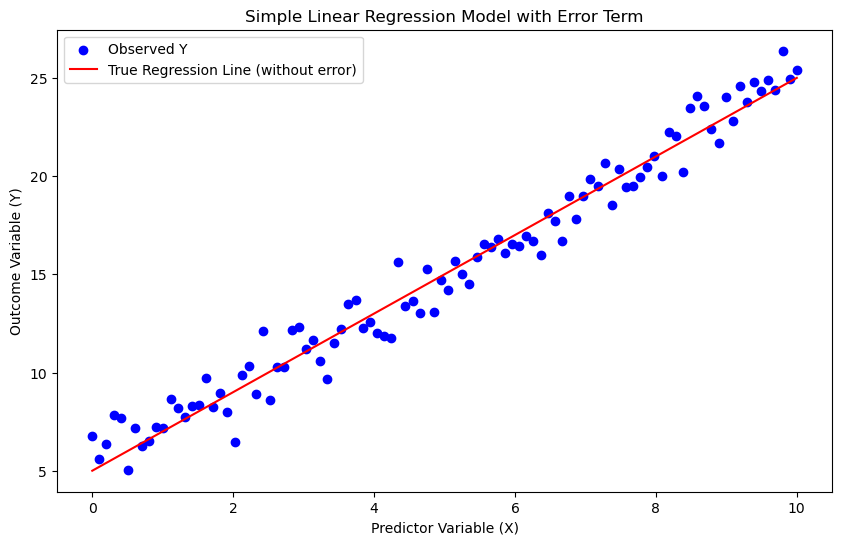

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(0)

# Define parameters for the model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 1   # Standard deviation of the error term (epsilon)

# Generate a sample of predictor values (X)
X = np.linspace(0, 10, 100)

# Generate error term (epsilon) from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=X.size)

# Generate outcome values (Y) based on the model Y = beta_0 + beta_1 * X + epsilon
Y = beta_0 + beta_1 * X + epsilon

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Observed Y')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='True Regression Line (without error)')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Simple Linear Regression Model with Error Term')
plt.legend()
plt.show("png")


Q2:

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.09e-76
Time:                        18:39:44   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2085      0.201     25.867      0.0

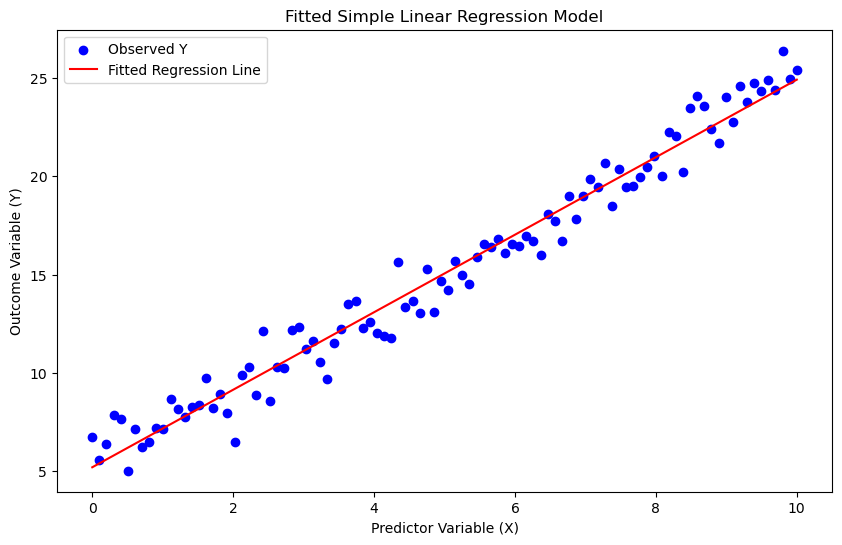

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(0)

# Define parameters for the model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 1   # Standard deviation of the error term (epsilon)

# Generate a sample of predictor values (X)
X = np.linspace(0, 10, 100)

# Generate error term (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, X.size)

# Generate outcome values (Y) based on the model Y = beta_0 + beta_1 * X + epsilon
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=data).fit()

# Print the model summary
print(model.summary())

# Visualize the observed data and the fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Observed Y')
plt.plot(data['X'], model.predict(data['X']), color='red', label='Fitted Regression Line')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Fitted Simple Linear Regression Model')
plt.legend()
plt.show("png")


Q3: In the plot:

Green Line: Represents the "true" regression line based on our theoretical model equation Y=β_0 +β_1 * X, without the random error term ϵ. This line reflects the exact, underlying relationship we assume exists between 𝑋 and Y.
Red Dashed Line: Shows the fitted regression line from the model estimated using our simulated dataset. This line is derived from our sampled data, which includes random variation (the error term ϵ).

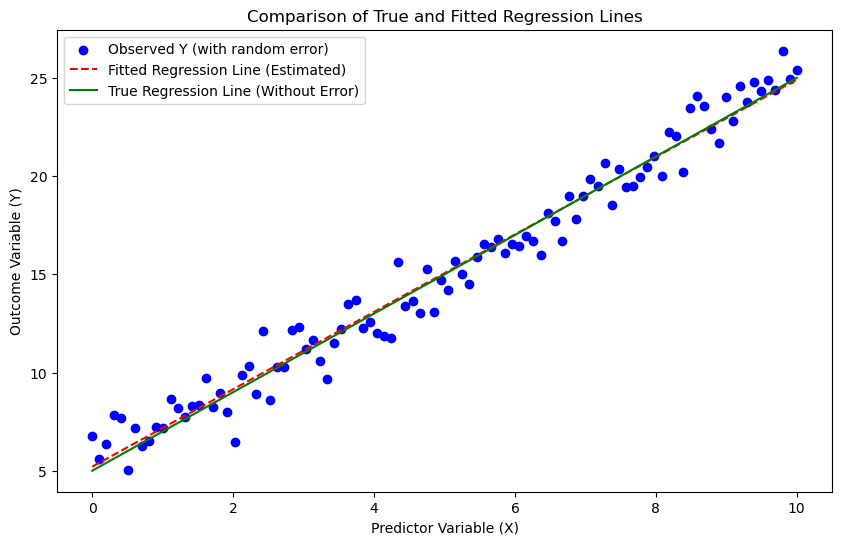

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(0)

# Define parameters for the model
beta_0 = 5  # Intercept of true model
beta_1 = 2  # Slope of true model
sigma = 1   # Standard deviation of the error term (epsilon)

# Generate a sample of predictor values (X)
X = np.linspace(0, 10, 100)

# Generate error term (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, X.size)

# Generate outcome values (Y) based on the model Y = beta_0 + beta_1 * X + epsilon
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=data).fit()

# Plot the observed data, fitted line, and true line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Observed Y (with random error)')
plt.plot(data['X'], model.predict(data['X']), color='red', linestyle='--', label='Fitted Regression Line (Estimated)')
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', label='True Regression Line (Without Error)')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Comparison of True and Fitted Regression Lines')
plt.legend()
plt.show("png")


Q4: Fitted_model.params (from fitted_model.summary().tables[1]) gives us the estimated coefficients.
These coefficients are then used to compute the predicted values (fitted_model.fittedvalues) based on the linear equation 𝑌^=𝛽0 + 𝛽1X
This array of fitted values is simply the estimated line passing through the data points in the dataset, based on the model’s best estimate of the intercept and slope.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


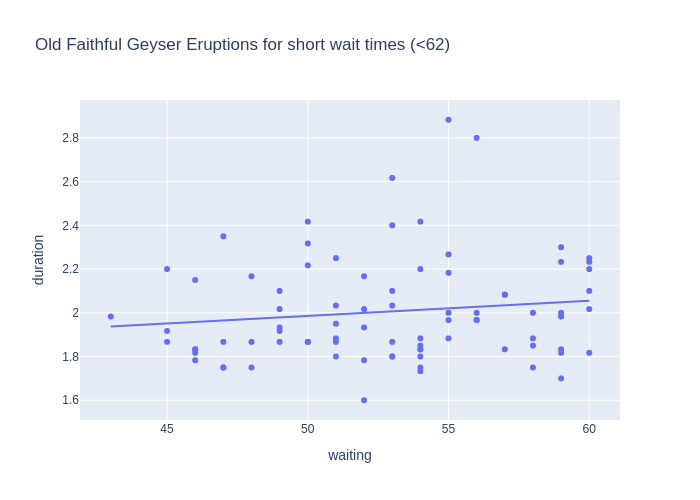

In [14]:
# Import necessary libraries
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset("geyser")

# Set short wait time limit
short_wait_limit = 62 # or 64 or 66

# Filter the data for short wait times
short_wait = old_faithful.waiting < short_wait_limit

# Fit and summarize the linear model
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

# Display the figure
fig.show(renderer="png")  # Use renderer="png" if required for GitHub or MarkUs submissions

Q9: If p-value < 0.05: There is evidence against the null hypothesis, suggesting that within the restricted range of short wait times, waiting still has a significant relationship with duration.
If p-value > 0.05: The data does not provide strong evidence against the null hypothesis, implying that any relationship between waiting and duration may be weaker or absent within shorter wait times compared to the full dataset.

Q11: Indicator Variable: Unlike continuous modeling of waiting in previous models, this model uses a categorical split ("short" vs. "long") to examine if there is an average difference in duration between the two groups. This simplifies the relationship to a comparison between two distinct groups rather than a continuous relationship.

Big Picture Difference: The previous models tested for a continuous relationship, where the slope of waiting directly influenced duration. Here, we are testing for a group-based difference in duration, which can help identify if the increase in eruption duration is more pronounced in "long" waiting times compared to "short" ones.

Coefficient for "long" (β_contrast): This will tell us the estimated difference in duration between "long" and "short" wait times.

P-value for "long": A low p-value (commonly < 0.05) would suggest significant evidence against the null hypothesis, indicating that the average eruption duration differs between "short" and "long" wait times.

Interpretation of Box Plot: The box plot visually compares the distributions of eruption duration for "short" and "long" groups, showing any notable difference in median and spread.

Chatbot history link: https://chatgpt.com/share/672d18e7-c0d0-800a-b8b8-9c0fa986f597